In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Secyan

In [2]:
data_sizes = ['1MB', '10MB', '100MB']
query_numbers = [1,2,3,4,5]
party_number = 2


query_dict = {}

from collections import defaultdict
for qnum in query_numbers:
    query_dict[qnum] = defaultdict(list)

for data_size in data_sizes:
    time_taken_col = f"{data_size}"
    cols = ["query", time_taken_col]
    path = f"secyan_data/{data_size}_{party_number}.csv"
    print(query_dict)

    # try:
    data = pd.read_csv(path, names=cols, header=None)
    time_col = data.loc[:,time_taken_col]
    query_col = data.loc[:,"query"]
    # data.set_axis(cols, axis=1)
    for idx, query_num in enumerate(query_col):
        query_dict[query_num][data_size].append(time_col[idx])
    print(query_dict)

    # except:
    #     print(f"Failed to read file {path}")
secyan_dict = {}
for qnum in query_numbers:
    secyan_dict[qnum] = [pd.Series(value).rename(k) for k, value in query_dict[qnum].items()]

for i in range(len(data_sizes)):
    print(secyan_dict[2][i])

# Returns a secyan_dict with key = query number

{1: defaultdict(<class 'list'>, {}), 2: defaultdict(<class 'list'>, {}), 3: defaultdict(<class 'list'>, {}), 4: defaultdict(<class 'list'>, {}), 5: defaultdict(<class 'list'>, {})}
{1: defaultdict(<class 'list'>, {'1MB': [0.366]}), 2: defaultdict(<class 'list'>, {'1MB': [0.323]}), 3: defaultdict(<class 'list'>, {'1MB': [0.604]}), 4: defaultdict(<class 'list'>, {'1MB': [1.916]}), 5: defaultdict(<class 'list'>, {'1MB': [20.15]})}
{1: defaultdict(<class 'list'>, {'1MB': [0.366]}), 2: defaultdict(<class 'list'>, {'1MB': [0.323]}), 3: defaultdict(<class 'list'>, {'1MB': [0.604]}), 4: defaultdict(<class 'list'>, {'1MB': [1.916]}), 5: defaultdict(<class 'list'>, {'1MB': [20.15]})}
{1: defaultdict(<class 'list'>, {'1MB': [0.366], '10MB': [1.888]}), 2: defaultdict(<class 'list'>, {'1MB': [0.323], '10MB': [1.965]}), 3: defaultdict(<class 'list'>, {'1MB': [0.604], '10MB': [3.56]}), 4: defaultdict(<class 'list'>, {'1MB': [1.916], '10MB': [11.16]}), 5: defaultdict(<class 'list'>, {'1MB': [20.15], '

# Data Station

In [3]:
data_sizes = ['1MB', '10MB', '100MB']
query_numbers = [1,2,3,4,5]
party_number = 2


query_dict = {}

from collections import defaultdict
for qnum in query_numbers:
    query_dict[qnum] = defaultdict(list)

for data_size in data_sizes:
    time_taken_col = f"{data_size}"
    cols = ["query", time_taken_col]
    path = f"ds_data/{data_size}_{party_number}.csv"
    print(query_dict)

    # try:
    data = pd.read_csv(path, names=cols, header=None)
    time_col = data.loc[:,time_taken_col]
    query_col = data.loc[:,"query"]
    # data.set_axis(cols, axis=1)
    for idx, query_num in enumerate(query_col):
        query_dict[query_num][data_size].append(time_col[idx])
    print(query_dict)

    # except:
    #     print(f"Failed to read file {path}")
data_station_dict = {}
for qnum in query_numbers:
    data_station_dict[qnum] = [pd.Series(value).rename(k) for k, value in query_dict[qnum].items()]

for i in range(len(data_sizes)):
    print(data_station_dict[2][i])

# Returns a data_station_dict with key = query number

{1: defaultdict(<class 'list'>, {}), 2: defaultdict(<class 'list'>, {}), 3: defaultdict(<class 'list'>, {}), 4: defaultdict(<class 'list'>, {}), 5: defaultdict(<class 'list'>, {})}
{1: defaultdict(<class 'list'>, {'1MB': [1.6899018287658691, 1.686737298965454, 1.6706793308258057]}), 2: defaultdict(<class 'list'>, {'1MB': [1.6954035758972168, 1.6751596927642822, 1.6704597473144531]}), 3: defaultdict(<class 'list'>, {'1MB': [1.6680192947387695, 1.6669683456420898, 1.6622095108032229]}), 4: defaultdict(<class 'list'>, {'1MB': [1.6811761856079102, 1.6742072105407717, 1.6886889934539795]}), 5: defaultdict(<class 'list'>, {'1MB': [1.6852927207946775, 1.687300682067871, 1.681570053100586]})}
{1: defaultdict(<class 'list'>, {'1MB': [1.6899018287658691, 1.686737298965454, 1.6706793308258057]}), 2: defaultdict(<class 'list'>, {'1MB': [1.6954035758972168, 1.6751596927642822, 1.6704597473144531]}), 3: defaultdict(<class 'list'>, {'1MB': [1.6680192947387695, 1.6669683456420898, 1.6622095108032229]}

# Plots

In [4]:
def raw_mmm(df):
    median = df.median()
    min = df.min()
    max = df.max()
    return min, median, max

[(0.366, 0.366, 0.366), (1.888, 1.888, 1.888), (15.356, 15.356, 15.356)]
[(1.6706793308258057, 1.686737298965454, 1.6899018287658691), (1.949019193649292, 1.9504640102386477, 1.9851453304290767), (3.592944622039795, 3.637662410736084, 4.804901361465454)]


/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


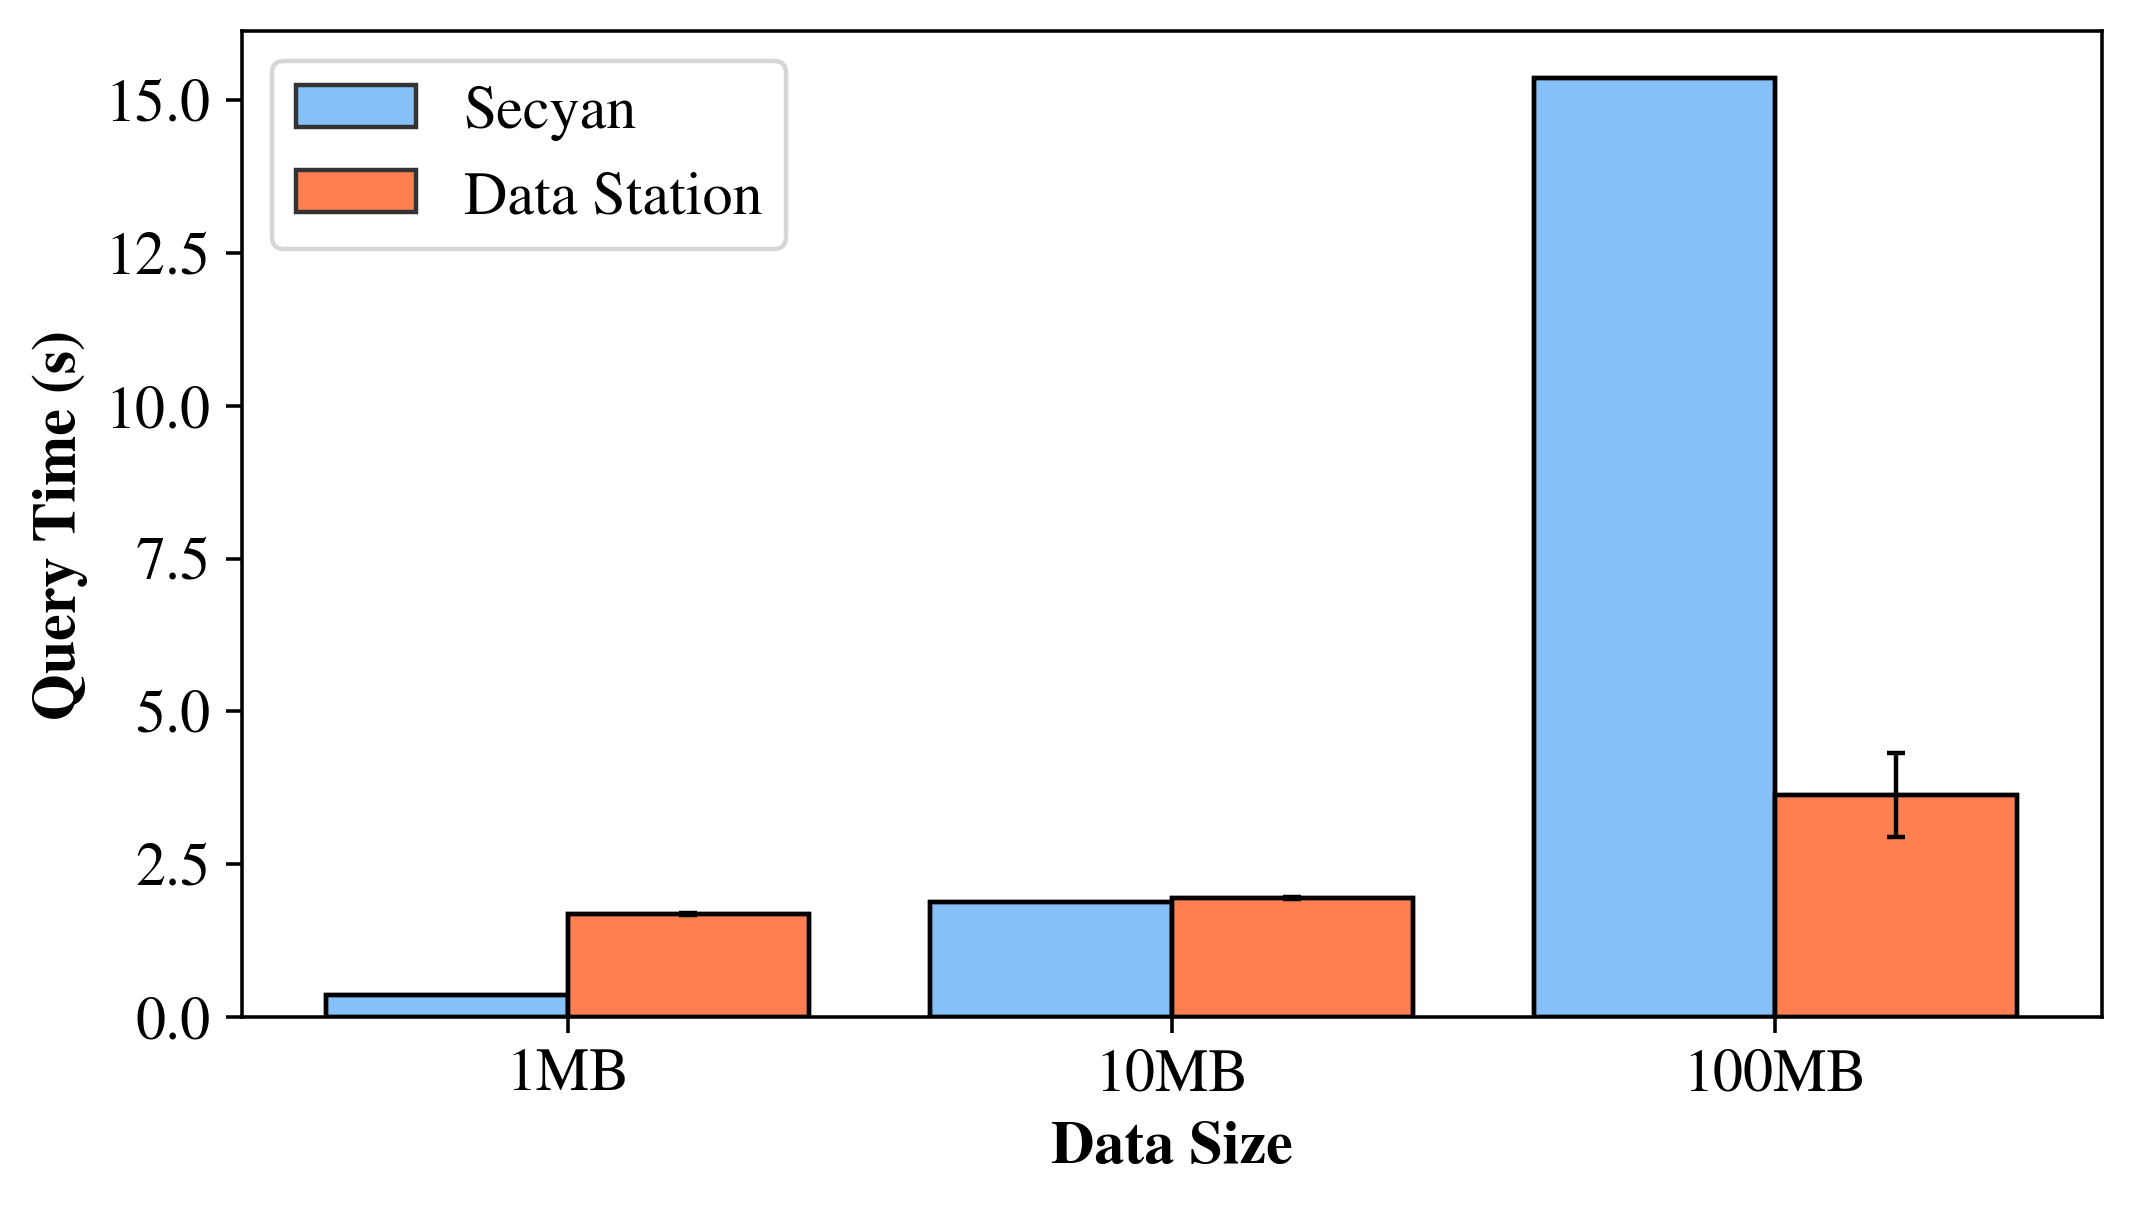

In [5]:
data_left = secyan_dict[1]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[1]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(3)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Secyan",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
# plt.title("100GB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q1.pdf", bbox_inches='tight')

plt.show()

[(0.323, 0.323, 0.323), (1.965, 1.965, 1.965), (15.769, 15.769, 15.769)]
[(1.6704597473144531, 1.6751596927642822, 1.6954035758972168), (1.9547386169433596, 1.955009937286377, 1.9624910354614256), (3.639318704605103, 3.665311813354492, 3.6720356941223145)]
[0.323, 1.965, 15.769]


/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


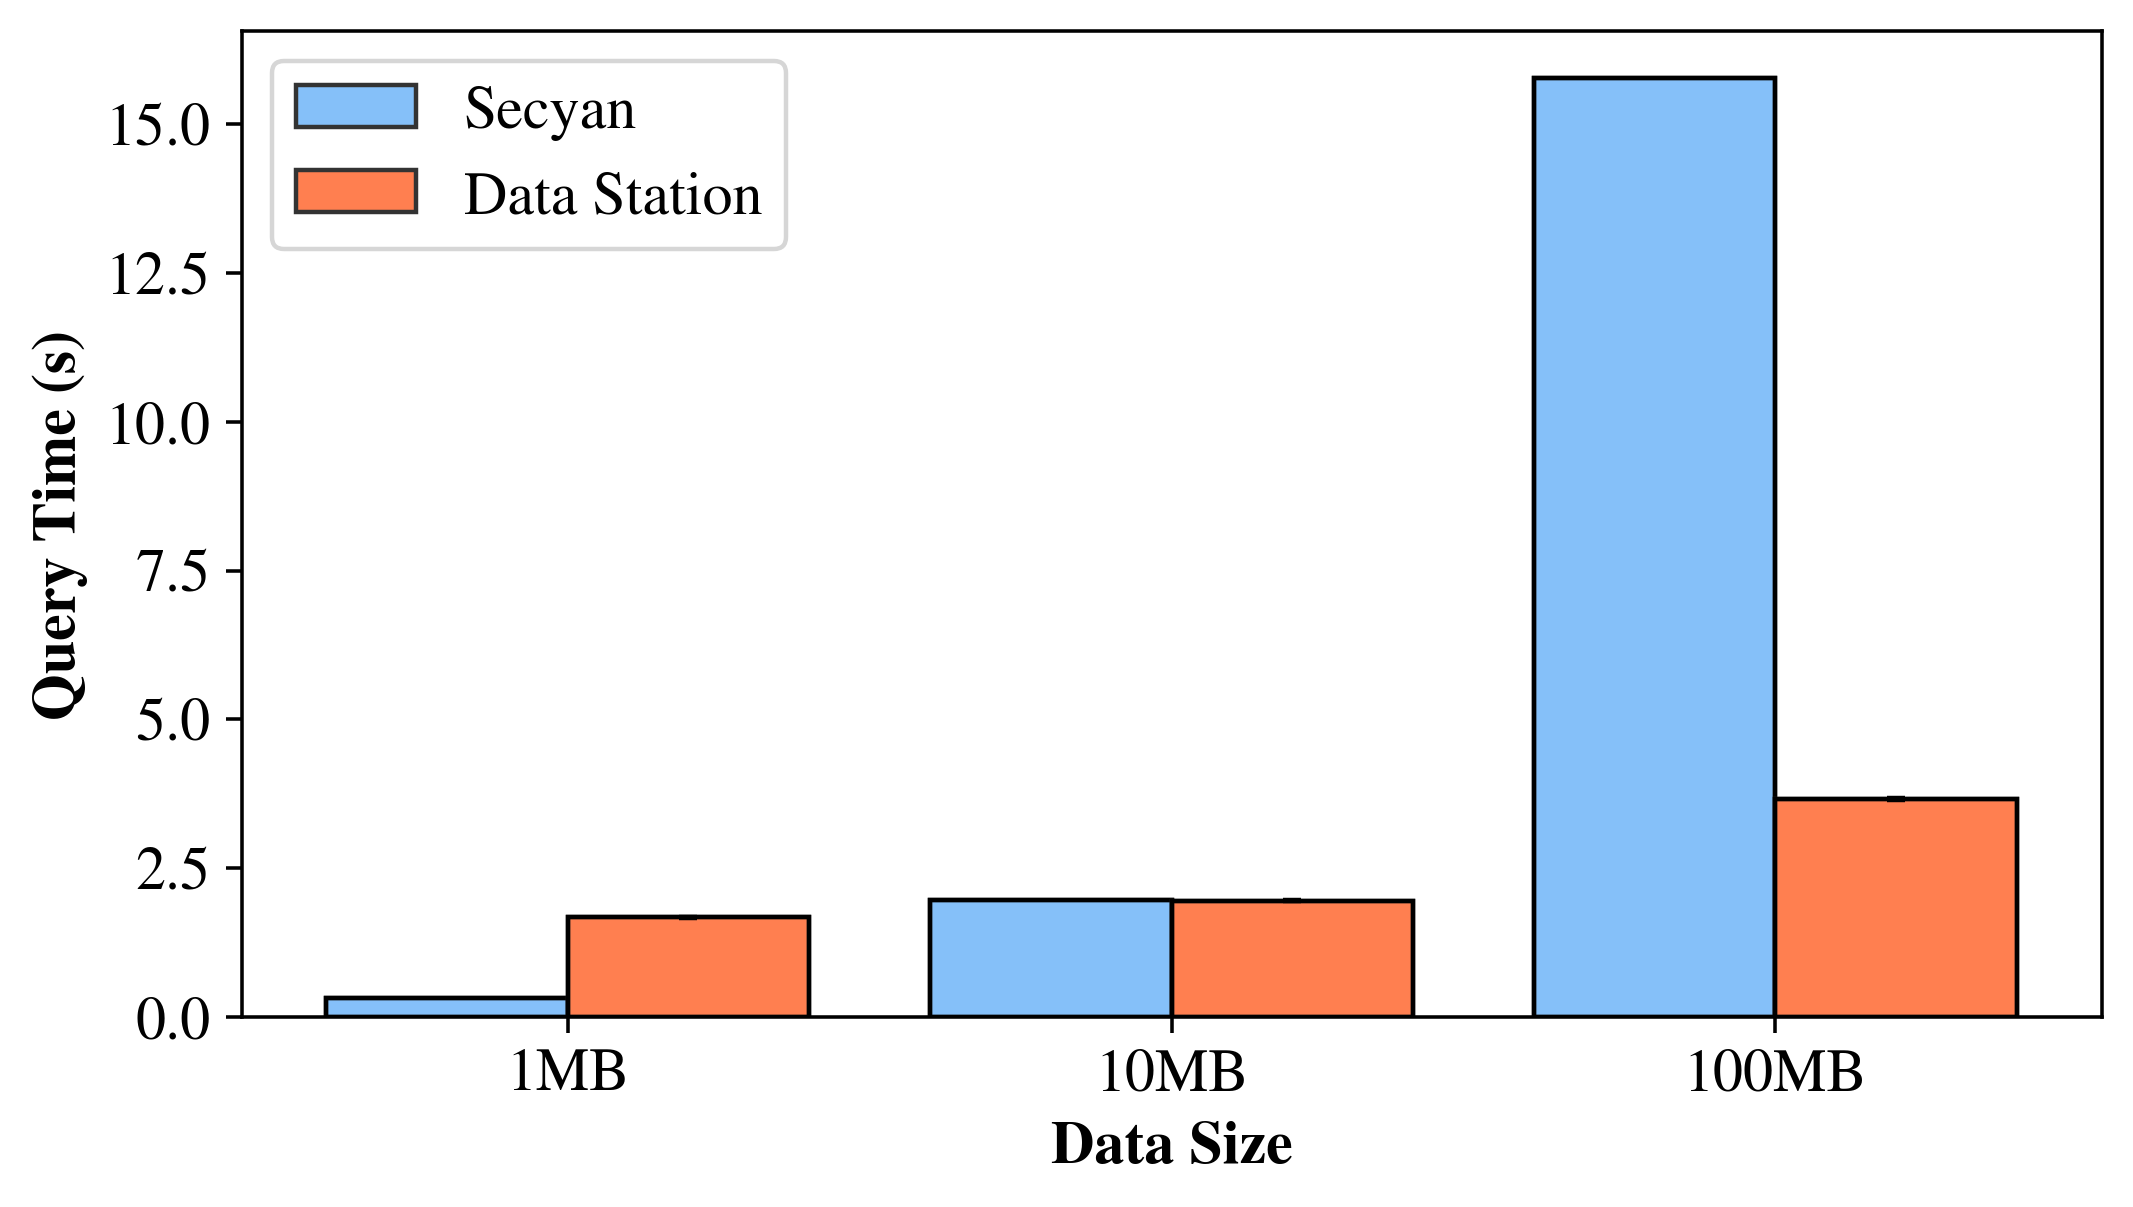

In [6]:
data_left = secyan_dict[2]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[2]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(3)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Secyan",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
# plt.title("100GB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q2.pdf", bbox_inches='tight')

plt.show()


[(0.604, 0.604, 0.604), (3.56, 3.56, 3.56), (30.971, 30.971, 30.971)]
[(1.6622095108032229, 1.6669683456420898, 1.6680192947387695), (1.956191062927246, 1.9806838035583496, 1.9807209968566892), (3.664049625396729, 3.677356004714966, 3.694794654846192)]
stdev_left: [nan, nan, nan]
medians_left: [0.604, 3.56, 30.971]


/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


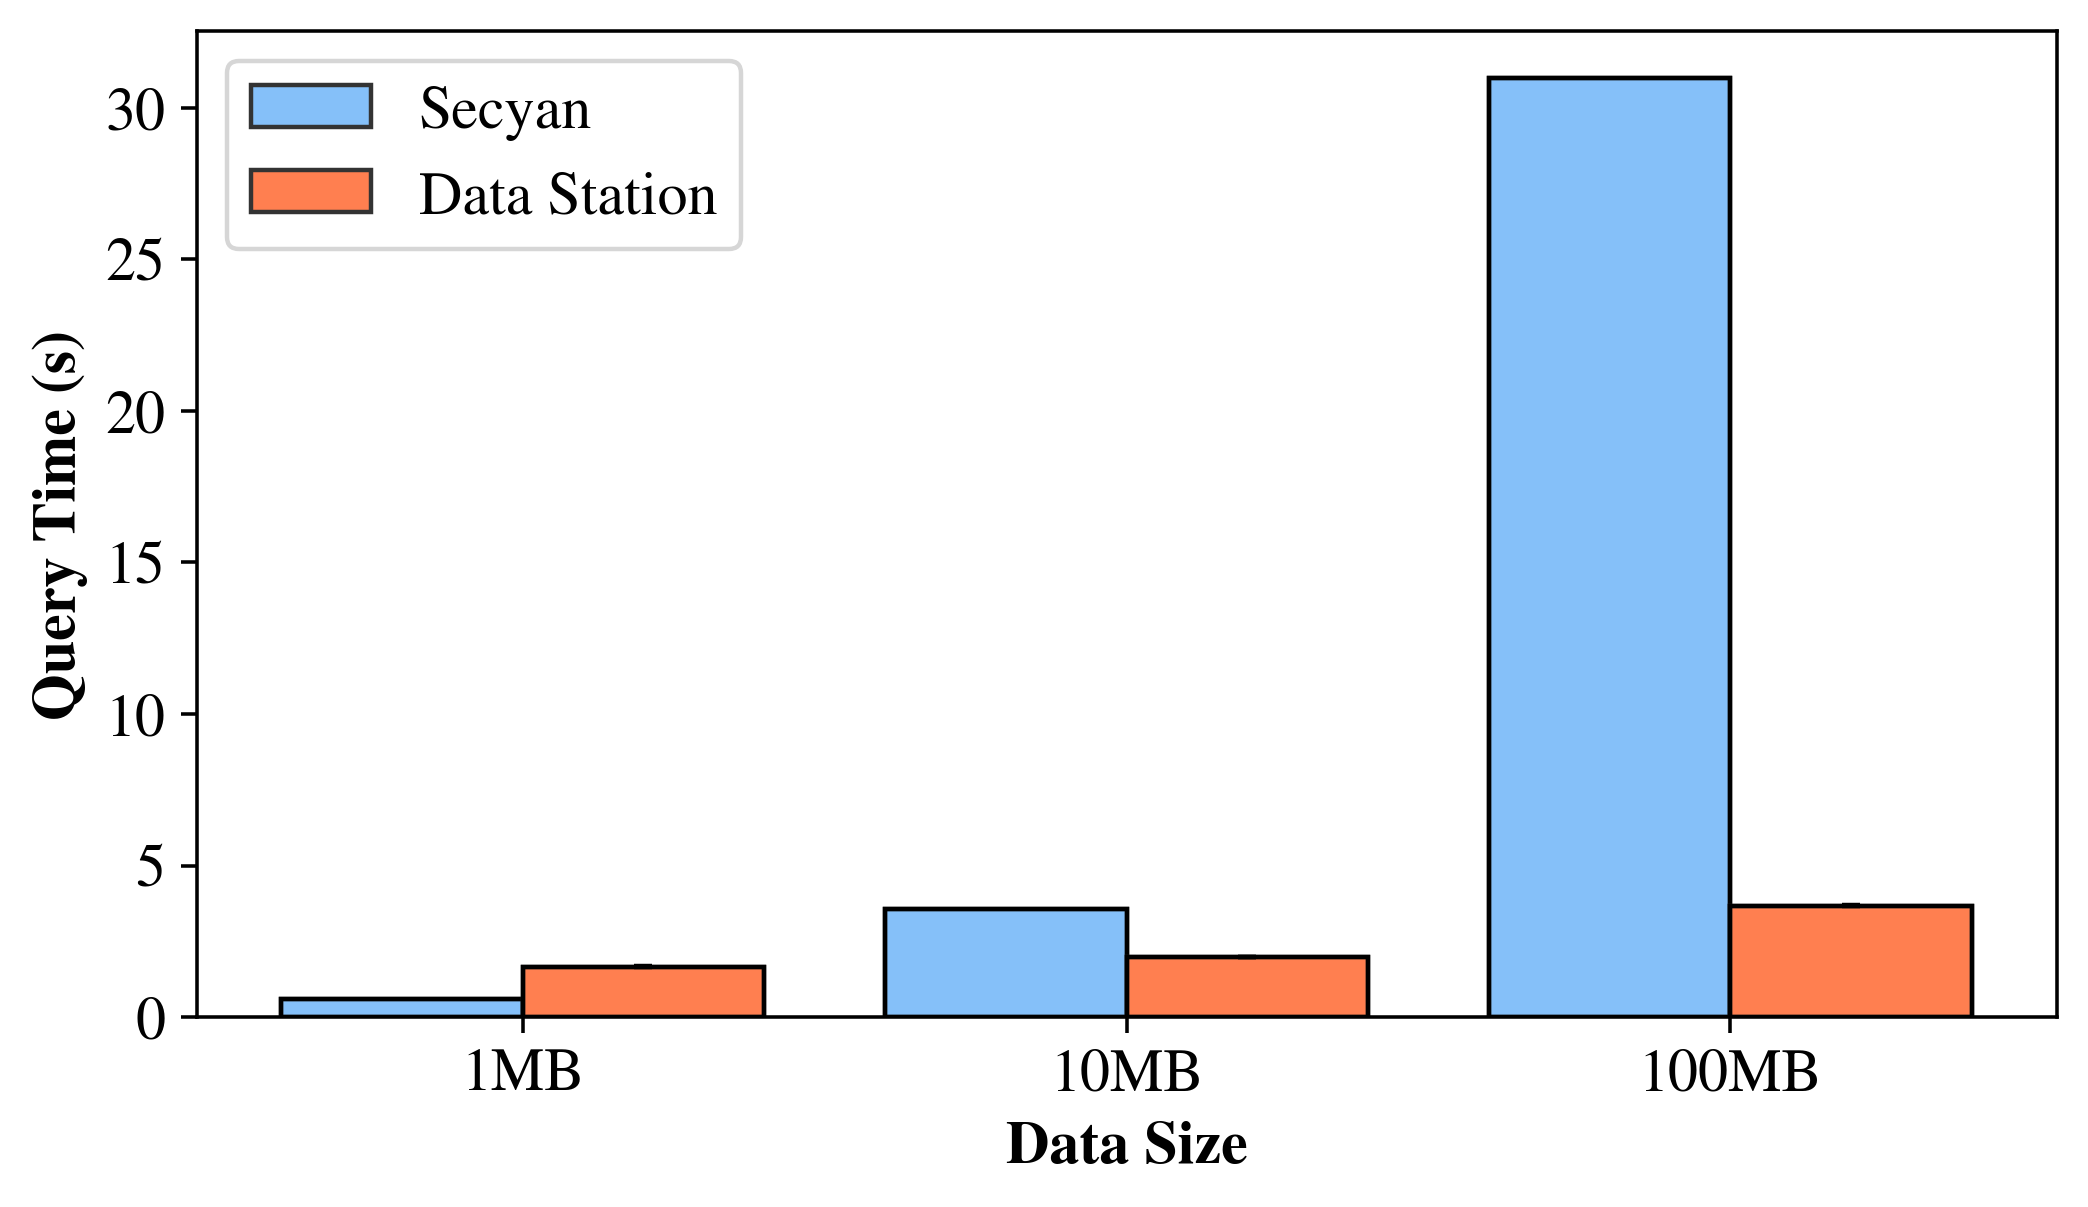

In [7]:
data_left = secyan_dict[3]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[3]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(3)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print("stdev_left:",stdev_left)
print("medians_left:",medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Secyan",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
# plt.title("100GB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q3.pdf", bbox_inches='tight')

plt.show()


[(1.916, 1.916, 1.916), (11.16, 11.16, 11.16), (101.591, 101.591, 101.591)]
[(1.6742072105407717, 1.6811761856079102, 1.6886889934539795), (1.995126485824585, 2.0001795291900635, 2.00180721282959), (3.686098575592041, 3.730656862258911, 3.744962692260742)]
[1.916, 11.16, 101.591]


/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


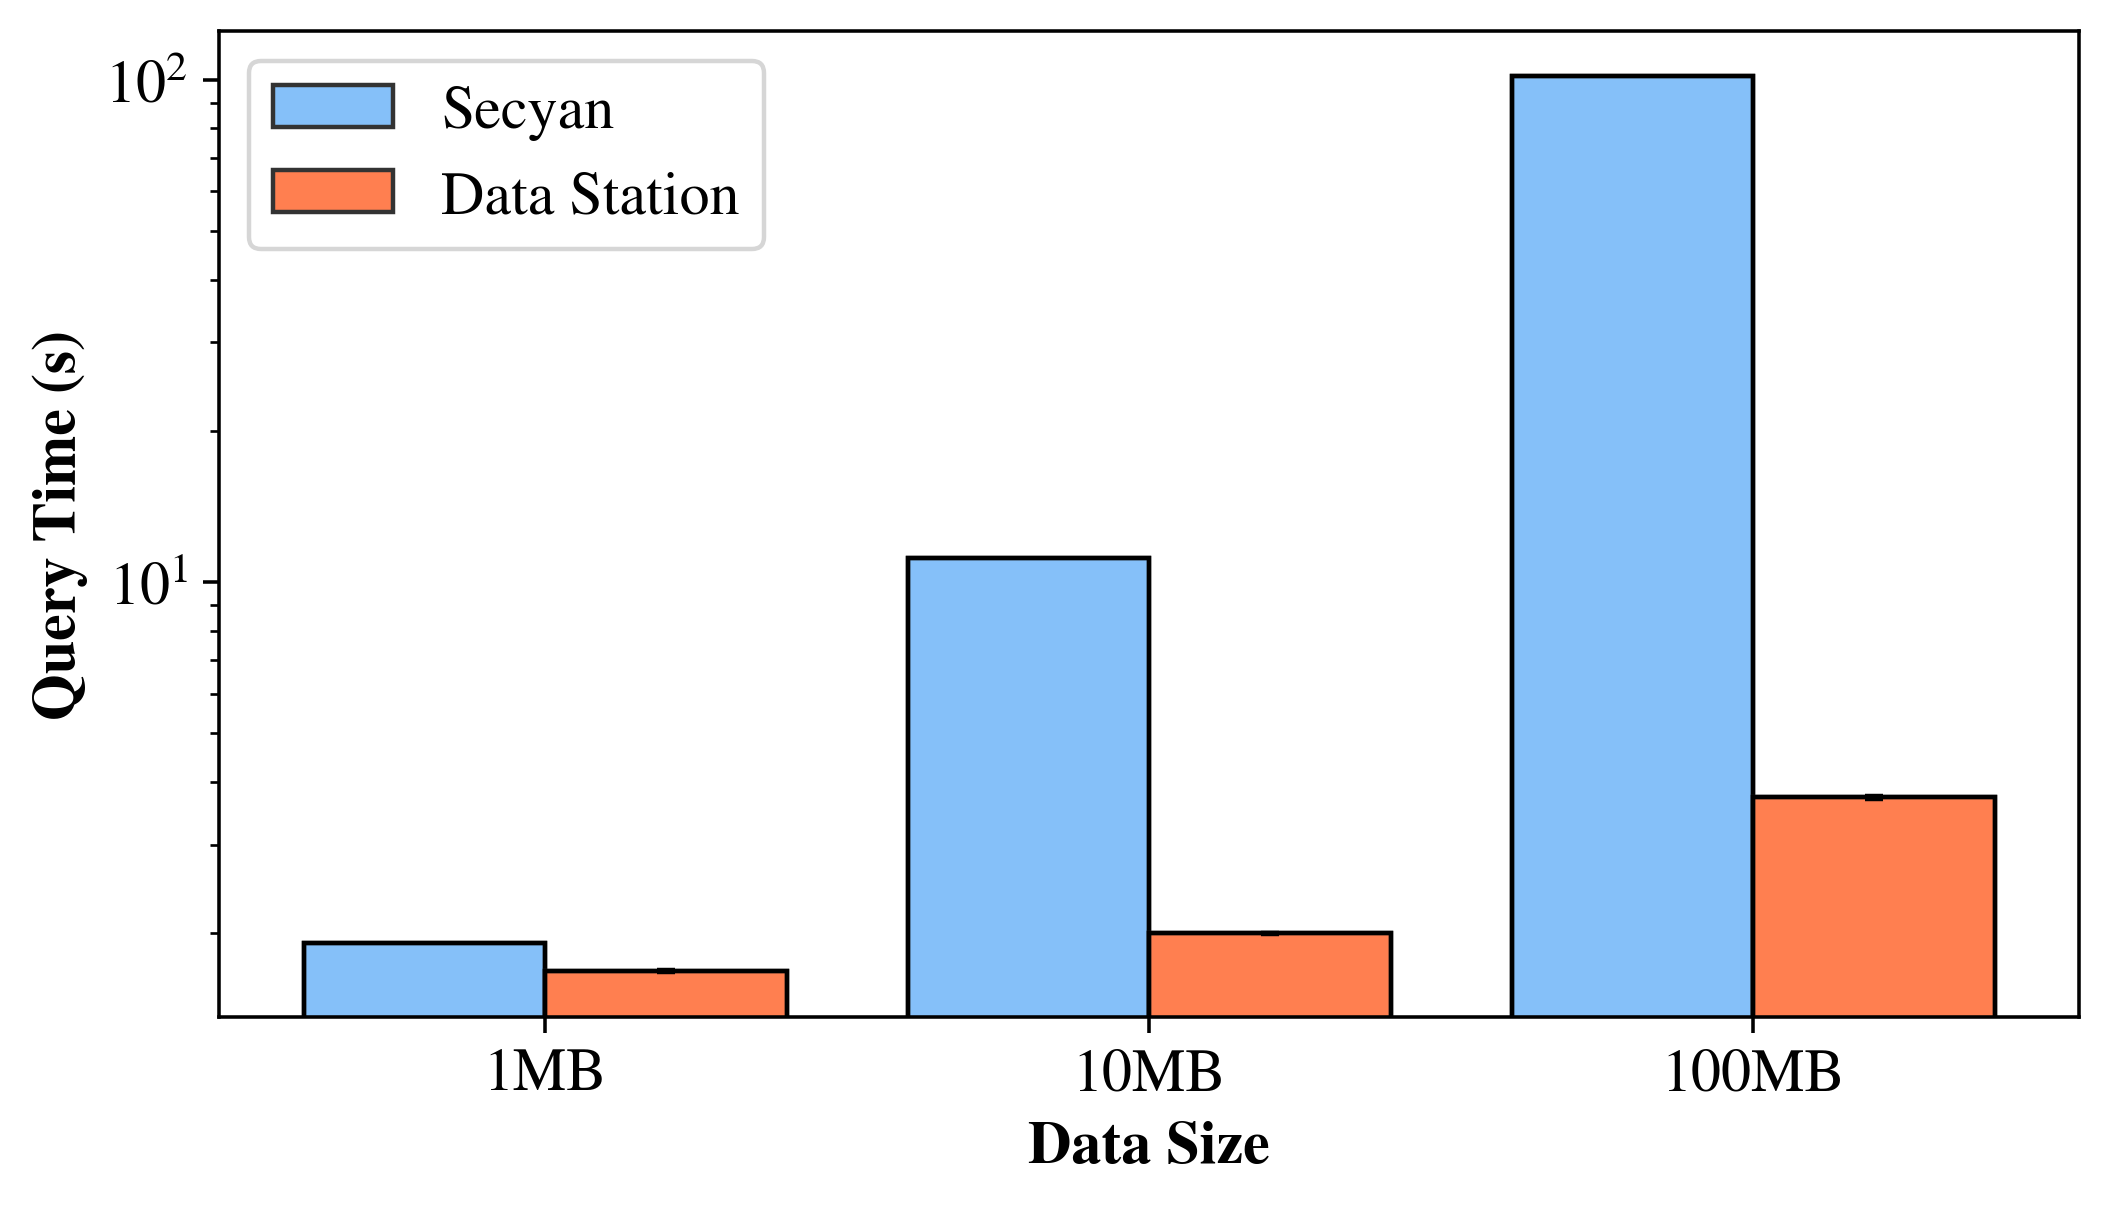

In [8]:
data_left = secyan_dict[4]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[4]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(3)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Secyan",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
plt.yscale("log")

plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
# plt.title("100GB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q4.pdf", bbox_inches='tight')

plt.show()


[(20.15, 20.15, 20.15), (112.0, 112.0, 112.0), (1045.0, 1045.0, 1045.0)]
[(1.681570053100586, 1.6852927207946775, 1.687300682067871), (2.013987302780152, 2.025477409362793, 2.038810968399048), (3.8689253330230713, 3.89555549621582, 3.91439151763916)]
[20.15, 112.0, 1045.0]


/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


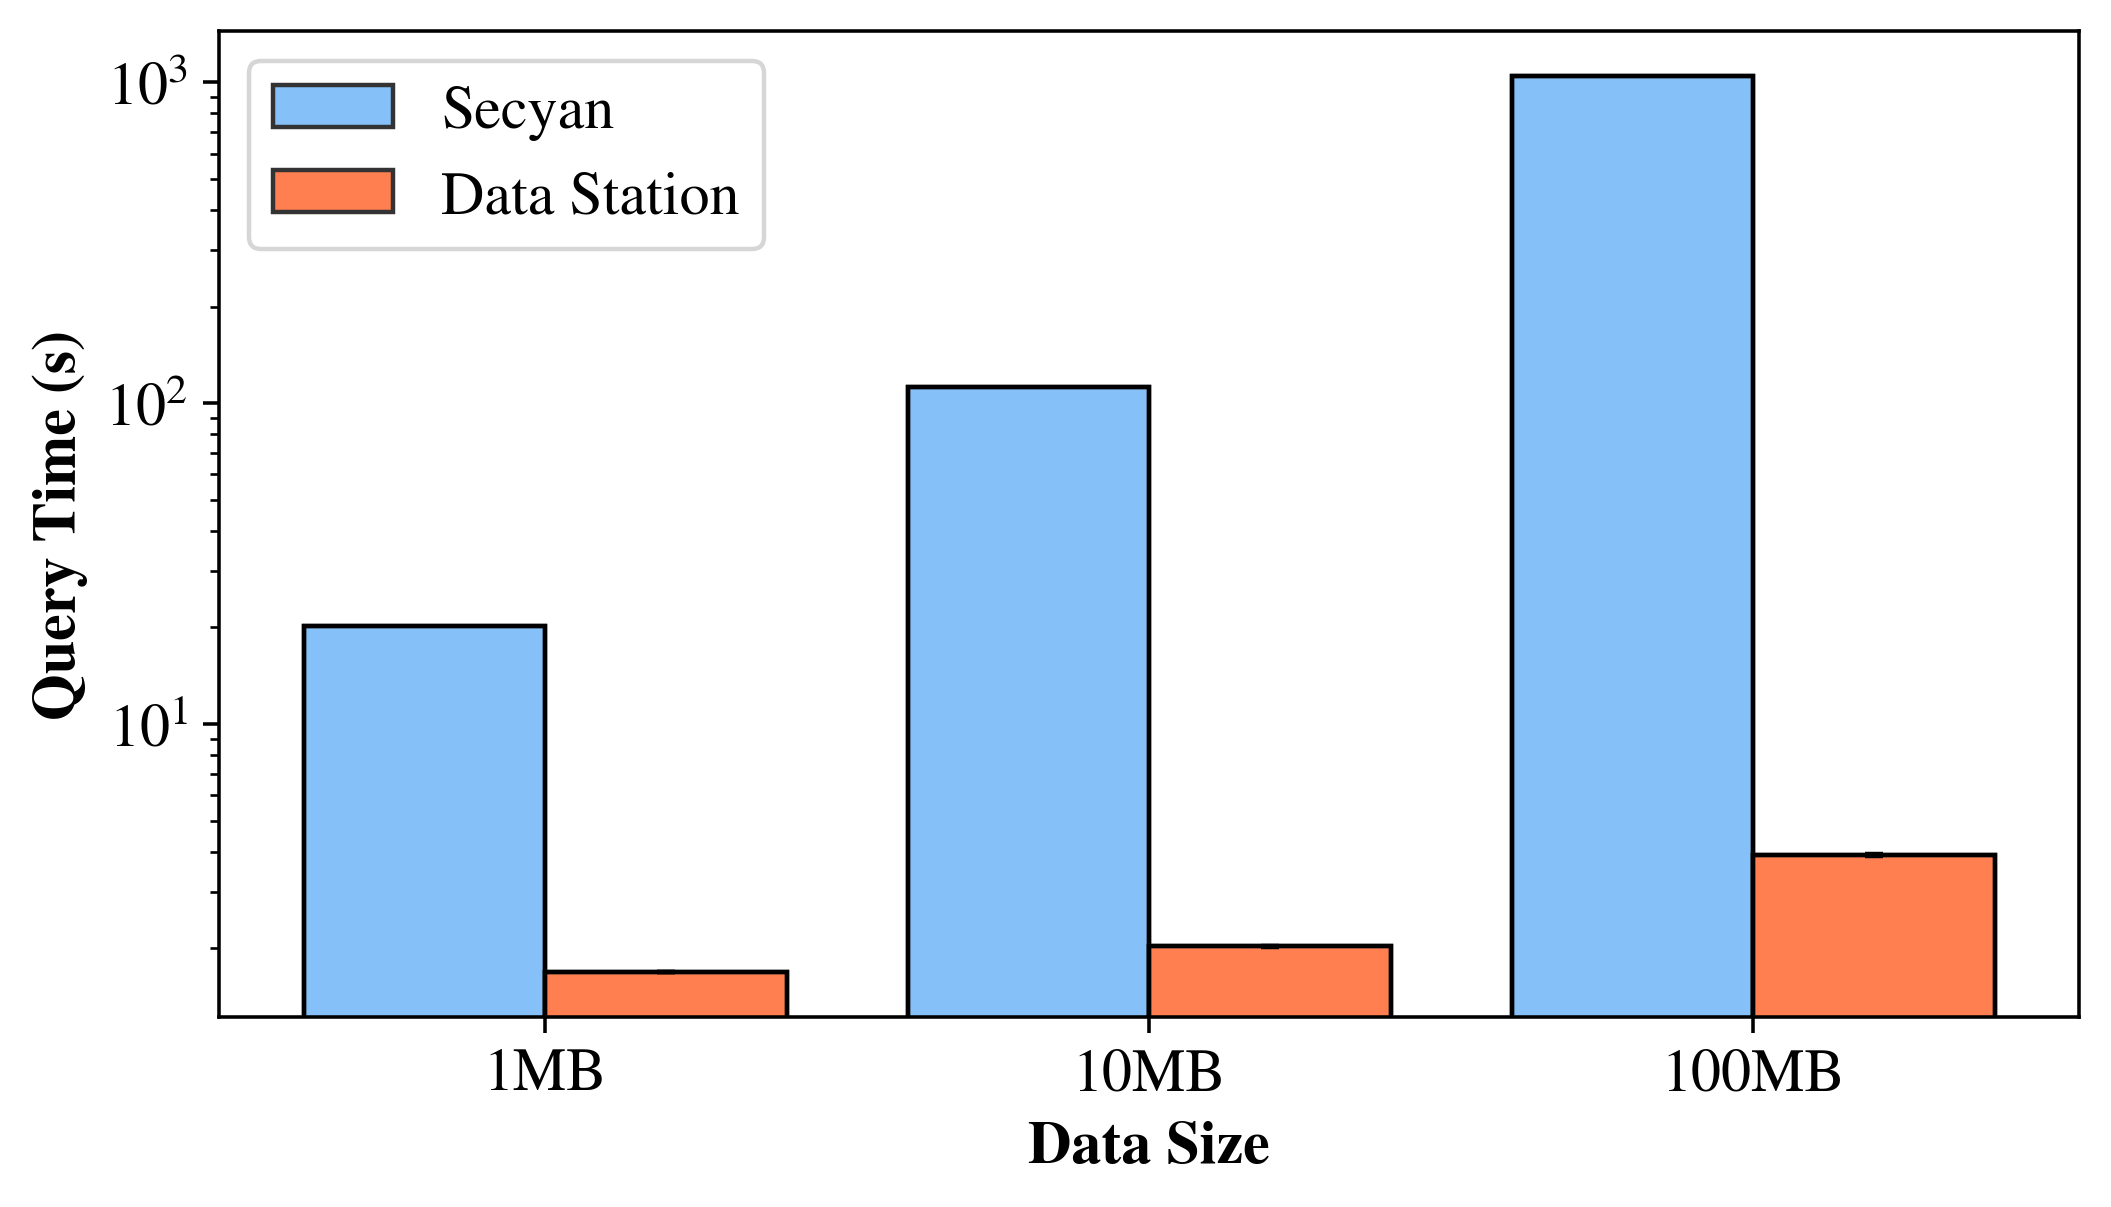

In [9]:
data_left = secyan_dict[5]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[5]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(3)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Secyan",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.yscale("log")

plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
# plt.title("100GB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q5.pdf", bbox_inches='tight')

plt.show()
